# Import Library

In [1]:
import kagglehub
import os, datetime
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Data Downloading

In [2]:
path = kagglehub.dataset_download("xhlulu/140k-real-and-fake-faces")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/140k-real-and-fake-faces


# Data Loading

In [3]:
base_dir = "/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/"
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
valid_dir = os.path.join(base_dir, 'valid')
train_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)
valid_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=32, class_mode='binary', target_size=(150, 150))
validation_generator = valid_datagen.flow_from_directory(
    valid_dir, batch_size=32, class_mode='binary', target_size=(150, 150))
test_generator = test_datagen.flow_from_directory(
    test_dir, batch_size=32, class_mode='binary', target_size=(150, 150), shuffle=False)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


# MobileNet Model

In [4]:
base_model = MobileNet(include_top=False, input_shape=(150, 150, 3), weights='imagenet')
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<ipython-input-4-ebdf1be63d43>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(include_top=False, input_shape=(150, 150, 3), weights='imagenet')


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Model Training

In [5]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    validation_steps=50,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 407s 128ms/step - accuracy: 0.7344 - loss: 0.5347 - val_accuracy: 0.7825 - val_loss: 0.4585
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 200s 64ms/step - accuracy: 0.7925 - loss: 0.4463 - val_accuracy: 0.8087 - val_loss: 0.4090
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 201s 64ms/step - accuracy: 0.8084 - loss: 0.4195 - val_accuracy: 0.8087 - val_loss: 0.4075
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 183s 58ms/step - accuracy: 0.8144 - loss: 0.4097 - val_accuracy: 0.8250 - val_loss: 0.4011
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - accuracy: 0.8237 - loss: 0.3919 - val_accuracy: 0.8363 - val_loss: 0.3722
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 262s 84ms/step - accuracy: 0.8309 - loss: 0.3791 - val_accuracy: 0.8363 - val_loss: 0.3641
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 204s 65ms/step - accuracy: 0.8382 - loss: 0.3655 - val_accuracy: 0.8363 - val_loss: 0.3576
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - accuracy:

# Plot Results

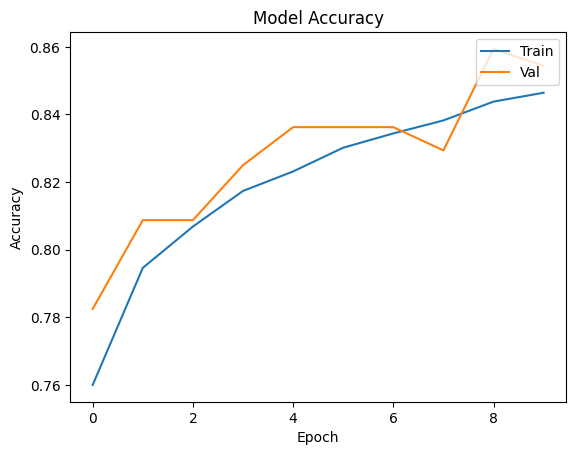

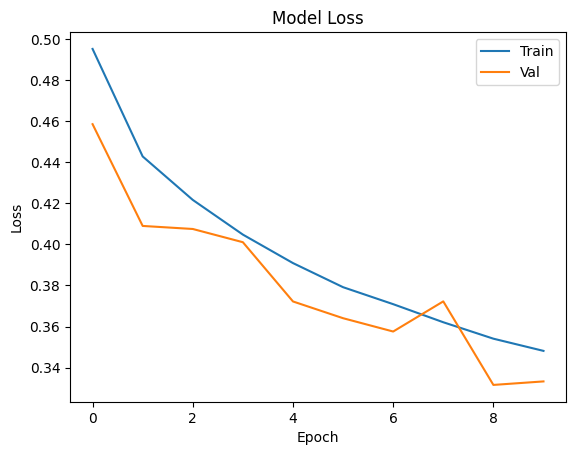

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Evalaution Metrics Results

In [7]:
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
y_true = test_generator.classes
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print("Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 122ms/step
Evaluation Metrics:
Accuracy : 0.8436
Precision: 0.8544
Recall   : 0.8282
F1-Score : 0.8411
